In [7]:
from showmethetypes import SMTT
import torch
import torch.nn as nn
from torch import Tensor
import matplotlib.pyplot as plt

In [8]:
tt = SMTT("torch")

In [9]:
class SparseAutoEncoder(nn.Module):
    def __init__(self, mundane_dim, hidden_dim, data, nonlinearity=nn.ReLU(), lam=0.5):
        super().__init__()
        self.W_in = nn.Parameter(
            nn.init.kaiming_uniform_(
                torch.empty(mundane_dim, hidden_dim), nonlinearity="relu"
            )
        )
        self.b_in = nn.Parameter(torch.zeros(hidden_dim))
        self.W_out = nn.Parameter(
            nn.init.kaiming_uniform_(
                torch.empty(hidden_dim, mundane_dim), nonlinearity="relu"
            )
        )
        self.b_out = nn.Parameter(torch.zeros(mundane_dim))
        self.nonlinearity = nonlinearity
        self.lam = lam

    def forward(self, input: Tensor, pt=False):
        input = input - self.b_out
        acts = self.nonlinearity(input @ self.W_in + self.b_in)
        l1_regularization = acts.abs().sum()
        if pt:
            print(acts)
        return acts @ self.W_out + self.b_out

In [10]:
recreate_me_please = torch.randn(32).to("cuda")

In [11]:
def numpy(thing):
    return thing.to("cpu").detach().numpy()

In [14]:
# autoenc = SparseAutoEncoder(32, 64, recreate_me_please, lam=0.001).to("cuda")
autoenc = SparseAutoEncoder(32, 1024, []).to("cuda")

ValueError: Fan in and fan out can not be computed for tensor with fewer than 2 dimensions

In [478]:
regularization = torch.nn.functional.l1_loss
loss_function = torch.nn.functional.mse_loss
# optimizer = torch.optim.AdamW(autoenc.parameters(), lr=1e-5)
optimizer = torch.optim.Adam(autoenc.parameters(), lr=1e-4)
# optimizer = torch.optim.SGD(autoenc.parameters(), 1e-5)

In [479]:
losses = []

In [480]:
epochs = 1000
for epoch in range(epochs):
    guess = autoenc(recreate_me_please)
    loss = loss_function(guess, recreate_me_please)

    losses.append(numpy(loss))
    optimizer.zero_grad()
    loss.backward()
    print(loss)
    optimizer.step()

tensor(0.6713, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5901, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5760, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5581, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5360, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5281, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5387, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5474, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5427, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5302, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5223, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5259, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5343, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5360, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5287, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5211, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5209, device='cuda:0', grad_fn=

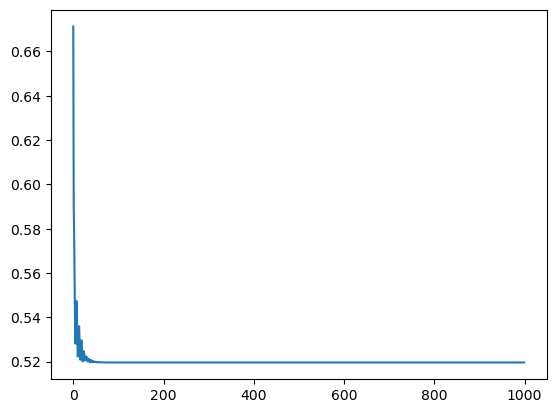

In [481]:
plt.plot(range(len(losses)), losses)

In [107]:
losses = []
epochs = 10000
for epoch in range(epochs):
    guess, l1 = autoenc(recreate_me_please)
    loss = loss_function(guess, recreate_me_please) + l1

    losses.append(numpy(loss))
    loss.backward()
    print(loss)
    optimizer.step()

tensor(17.7028, grad_fn=<AddBackward0>)
tensor(17.5926, grad_fn=<AddBackward0>)
tensor(17.4864, grad_fn=<AddBackward0>)
tensor(17.3810, grad_fn=<AddBackward0>)
tensor(17.2753, grad_fn=<AddBackward0>)
tensor(17.1695, grad_fn=<AddBackward0>)
tensor(17.0653, grad_fn=<AddBackward0>)
tensor(16.9601, grad_fn=<AddBackward0>)
tensor(16.8538, grad_fn=<AddBackward0>)
tensor(16.7462, grad_fn=<AddBackward0>)
tensor(16.6373, grad_fn=<AddBackward0>)
tensor(16.5272, grad_fn=<AddBackward0>)
tensor(16.4157, grad_fn=<AddBackward0>)
tensor(16.3030, grad_fn=<AddBackward0>)
tensor(16.1890, grad_fn=<AddBackward0>)
tensor(16.0737, grad_fn=<AddBackward0>)
tensor(15.9572, grad_fn=<AddBackward0>)
tensor(15.8393, grad_fn=<AddBackward0>)
tensor(15.7203, grad_fn=<AddBackward0>)
tensor(15.6000, grad_fn=<AddBackward0>)
tensor(15.4786, grad_fn=<AddBackward0>)
tensor(15.3582, grad_fn=<AddBackward0>)
tensor(15.2381, grad_fn=<AddBackward0>)
tensor(15.1169, grad_fn=<AddBackward0>)
tensor(14.9946, grad_fn=<AddBackward0>)


In [80]:
torch.lt(autoenc.W_in.weight.data, -0.001).sum(0)

tensor([51, 52, 13, 12, 56, 12, 49, 52, 50, 15, 12, 48, 11, 47,  9, 50, 44, 13,
        12, 51, 52, 11, 53, 11, 50, 13, 12, 15, 12, 14, 53, 57])

In [65]:
autoenc.W_in.weight.data.shape

torch.Size([64, 32])

In [214]:
recreate_me_please - autoenc(recreate_me_please)

tensor([ 0.0183, -0.0266, -0.0477,  0.0702,  0.0044,  0.0902,  0.0048, -0.0506,
        -0.0193,  0.0272,  0.0191, -0.0504,  0.0249, -0.0635, -0.0355, -0.0406,
        -0.0454, -0.0170,  0.0388, -0.0049, -0.0282,  0.0367,  0.0179, -0.0291,
         0.0389, -0.0449, -0.0182,  0.0218,  0.0006, -0.0188,  0.0545, -0.0058],
       device='cuda:0', grad_fn=<SubBackward0>)

In [215]:
recreate_me_please

tensor([ 0.5034, -1.0712, -0.4744,  1.5571,  0.1632,  1.6281, -1.1388,  0.3130,
         0.3229,  0.4698, -0.4765, -0.4090, -0.5500, -2.0835,  0.1208, -1.4896,
         0.0617,  0.5447,  1.1721,  0.8848, -0.1802, -0.0509,  0.2434,  0.2224,
         0.9308, -0.5637, -0.1489,  0.5065,  0.8773, -0.9383,  0.8846,  0.7413],
       device='cuda:0')

In [216]:
autoenc(recreate_me_please)

tensor([ 0.4851, -1.0446, -0.4267,  1.4870,  0.1588,  1.5379, -1.1436,  0.3636,
         0.3421,  0.4426, -0.4956, -0.3586, -0.5749, -2.0200,  0.1564, -1.4489,
         0.1070,  0.5618,  1.1333,  0.8898, -0.1520, -0.0876,  0.2254,  0.2515,
         0.8919, -0.5187, -0.1306,  0.4847,  0.8767, -0.9195,  0.8301,  0.7471],
       device='cuda:0', grad_fn=<AddBackward0>)

In [109]:
autoenc.W_in.item()

AttributeError: 'Linear' object has no attribute 'item'

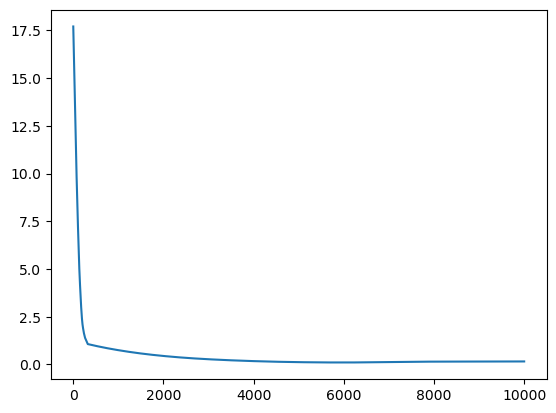

In [110]:
plt.plot(range(epochs), losses)